In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


Imagine you're trying to decide whether to play outside based on the weather. A decision tree is like a flowchart that helps you make that decision step by step.

1. **Starting Point:** You start with a question, like "Is it sunny?"

2. **Branching:** Depending on the answer, you follow different paths. If it's sunny, you might ask, "Is the temperature warm?" If it's not sunny, you might ask, "Is it raining?"

3. **More Branches:** Each question leads to more questions. For example, if it's warm, you might decide to go out. If it's not raining, you might also decide to go out.

4. **Final Decision:** Eventually, you reach an endpoint where you make a decision. This could be "Play outside" or "Stay inside."

A decision tree in data analytics works similarly. It's a computer program that makes decisions about data by asking a series of questions based on the features of the data. These questions help the program figure out what category something belongs to or predict a value, like guessing if a person will like a movie based on their age and movie preferences.

Just like you might ask about sunny weather and warm temperature to decide to play outside, a decision tree might ask about different features of data to decide what category it belongs to. It's a way for computers to make smart choices based on information.

In [2]:
df = pd.read_csv("Dataset/salaries.csv")

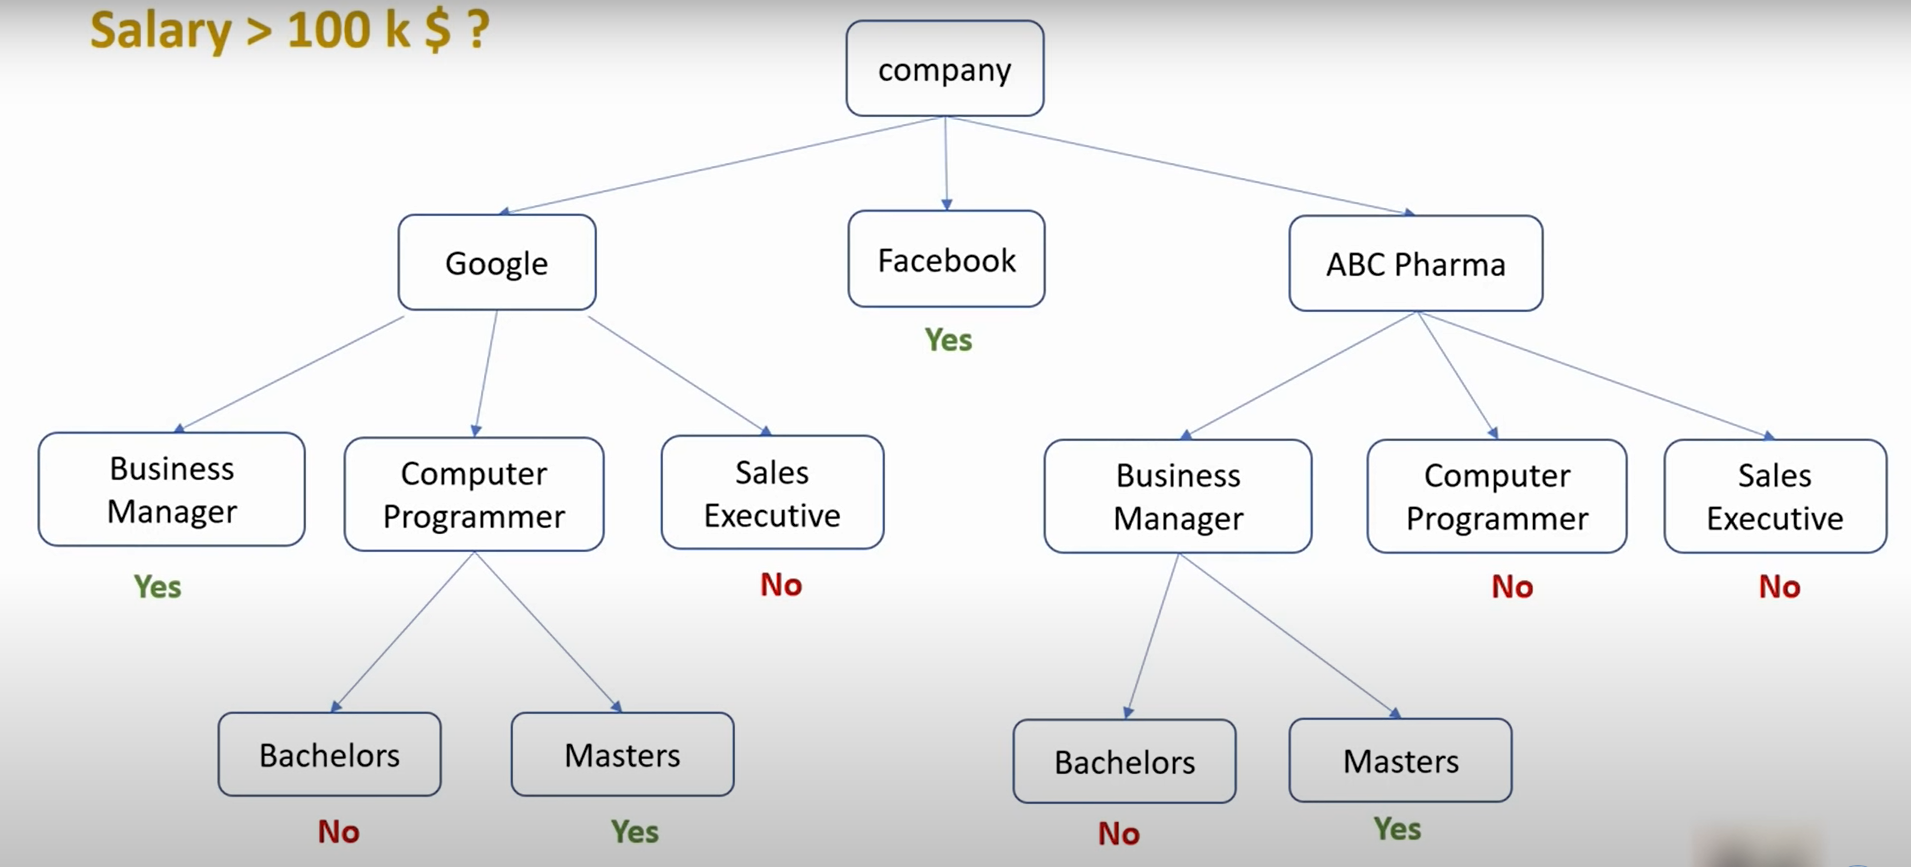

* Entropy is the measure of randomness

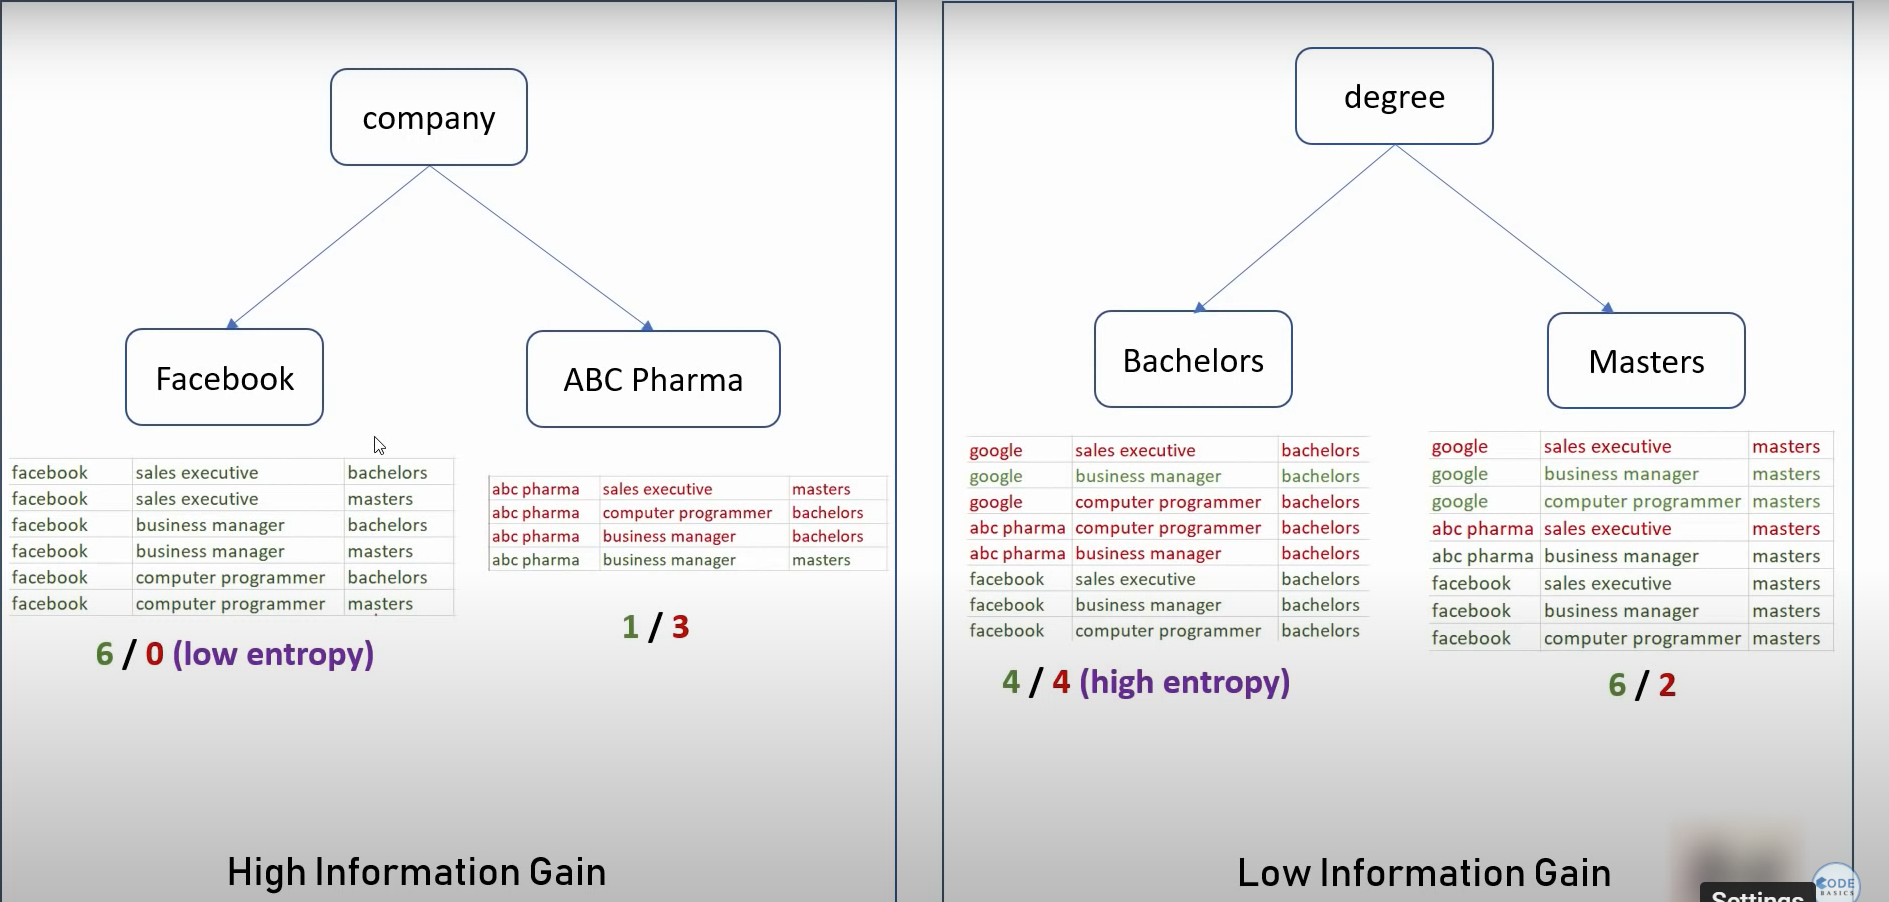

## Gini Impurity

Sure! Think of Gini Impurity like a tool used by a decision-making tree to figure out how messy or mixed up the things it's trying to sort are.

Imagine you have a box of colored balls, and you want to separate them into different boxes based on their colors. The Gini Impurity tells you how jumbled the colors are in the original box.

If all the balls in the box are the same color, the Gini Impurity is really low, like saying "Yay, all clean!" But if the balls are a mix of colors, the Gini Impurity is higher, like saying "Hmm, things are a bit messy."

When the decision-making tree is trying to decide where to split the balls into different boxes, it picks the split that makes the messiest box cleaner. It's like tidying up the colors as much as possible.

So, in short, Gini Impurity helps the decision-making tree sort things out neatly by telling it which split makes the messiest group less mixed up.

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
inputs=df.drop(['salary_more_then_100k'],axis='columns')
targets=df['salary_more_then_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [6]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_job.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [7]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')

In [8]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
x=inputs_n
y=targets

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn import tree

In [12]:
model=tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs_n,targets)

DecisionTreeClassifier()

In [14]:
model.score(inputs_n,targets)*100

100.0